## Job Outcome Analysis of Students Graduated from College

In this project, we will be working on a dataset about the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

   + Rank - Rank by median earnings (the dataset is ordered by this column).
   + Major_code - Major code.
   + Major - Major description.
   + Major_category - Category of major.
   + Total - Total number of people with major.
   + Sample_size - Sample size (unweighted) of full-time.
   + Men - Male graduates.
   + Women - Female graduates.
   + ShareWomen - Women as share of total.
   + Employed - Number employed.
   + Median - Median salary of full-time, year-round workers.
   + Low_wage_jobs - Number in low-wage service jobs.
   + Full_time - Number employed 35 hours or more.
   + Part_time - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

   + Do students in more popular majors make more money?
   + How many majors are predominantly male? Predominantly female?
   + Which category of majors have the most students?
   
We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [1]:
#Setup the environment by importing the libraries we need and run the necessary Jupyter magic so that plots are displayed inline.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Read the dataset into a DataFrame and start exploring the data.
recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [2]:
#Generate summary statistics for all of the numeric columns.
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors. Now we need to drop rows with missing values.

In [3]:
#Look up the number of rows in recent_grads.
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
#Check the number of rows in recent_grads now.
cleaned_data_count = recent_grads.shape[0]
print(raw_data_count)
print(cleaned_data_count)

173
172


We notice that only one row contained missing values and was dropped.

## Pandas, Scatter Plots
After we cleaned our dataset, we will generate plots to explore the data. We will use scatter plots to explore the following questions:
   + Do students in more popular majors make more money?
   + Do students that majored in subjects that were majority female make more money?
   + Is there any link between the number of full-time employees and median salary?

To answer whether students in more popular majors make more money, we need to explore the relations of Sample_size with Median and Unemployment_rate.

In [4]:
print(recent_grads['Sample_size'].value_counts().sort_index())

2       1
3       2
4       3
5       2
7       3
8       1
9       1
10      2
11      1
13      1
14      1
16      1
17      1
18      1
21      1
22      3
24      2
25      1
26      2
28      1
29      1
30      2
31      2
32      1
36      2
37      2
38      1
39      1
43      1
44      1
       ..
541     1
546     1
565     1
569     1
590     1
623     1
631     1
681     1
843     1
919     1
1014    1
1024    1
1029    1
1058    1
1186    1
1196    1
1322    1
1370    1
1387    1
1436    1
1629    1
1728    1
2042    1
2189    1
2380    1
2394    1
2554    1
2584    1
2684    1
4212    1
Name: Sample_size, Length: 147, dtype: int64


In [5]:
print(recent_grads['Median'].value_counts().sort_index())

22000      1
23400      1
25000      2
26000      1
27000      2
27500      1
28000      3
29000      4
30000      8
30500      1
31000      3
31500      1
32000      8
32100      1
32200      1
32400      1
32500      1
33000      9
33400      1
33500      2
34000      8
35000     20
35600      1
36000      6
36200      1
36400      1
37000      1
37400      1
37500      1
38000      5
38400      1
39000      1
40000     17
40100      1
41000      2
41300      1
42000      2
44000      1
44700      1
45000      9
46000      3
47000      2
48000      1
50000      9
51000      1
52000      2
53000      1
54000      2
56000      1
57000      1
57100      1
58000      1
60000      6
62000      2
65000      2
70000      1
73000      1
75000      1
110000     1
Name: Median, dtype: int64


(21000, 111000)

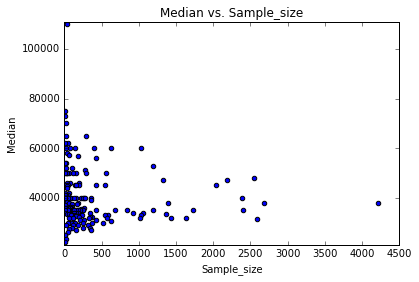

In [6]:
#Generate scatter plot with Sample_size and Median columns.
ax = recent_grads.plot(x = 'Sample_size', y = 'Median', kind = 'scatter')
ax.set_title('Median vs. Sample_size')
ax.set_xlim(0,4500)
ax.set_ylim(21000,111000)

In [7]:
print(recent_grads['Unemployment_rate'].value_counts().sort_index())

0.000000    5
0.006334    1
0.011690    1
0.016203    1
0.018381    1
0.019642    1
0.021167    1
0.022229    1
0.023043    1
0.024096    1
0.024374    1
0.027789    1
0.028308    1
0.029480    1
0.029650    1
0.033652    1
0.034118    1
0.035354    1
0.036546    1
0.036983    1
0.037819    1
0.038638    1
0.040105    1
0.041508    1
0.042507    1
0.042876    1
0.044863    1
0.045455    1
0.046320    1
0.046586    1
           ..
0.096052    1
0.096175    1
0.096448    1
0.096726    1
0.096798    1
0.096799    1
0.097244    1
0.099092    1
0.099723    1
0.101175    1
0.102197    1
0.102792    1
0.103455    1
0.104436    1
0.104946    1
0.105772    1
0.107116    1
0.107579    1
0.108787    1
0.112144    1
0.113332    1
0.113459    1
0.113983    1
0.117241    1
0.119511    1
0.128426    1
0.149048    1
0.151850    1
0.159491    1
0.177226    1
Name: Unemployment_rate, Length: 168, dtype: int64


(0, 0.18)

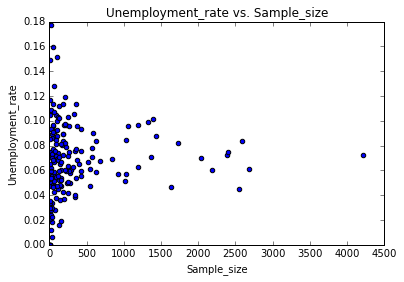

In [8]:
#Generate scatter plot with Sample_size and Unemployment_rate columns.
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Unemployment_rate vs. Sample_size')
ax.set_xlim(0,4500)
ax.set_ylim(0, 0.18)

In the scatter plot with Sample_size and Median, we notice that with similar sample sizes, the median salaries could vary a lot. The sample size of the major with the biggest median wasn't the biggest. As for unemployment rate, same thing happens to the scatter plot with Sample_size and Unemployment_rate. So we cannot conclude that students in more popular majors make more money.

Next, let's explore the relation between female percentages and earnings.

In [9]:
print(recent_grads['ShareWomen'].value_counts().sort_index())

0.000000    1
0.077453    1
0.090713    1
0.101852    1
0.107313    1
0.119559    1
0.120564    1
0.124950    1
0.125035    1
0.139793    1
0.144967    1
0.153037    1
0.174123    1
0.178982    1
0.180883    1
0.183985    1
0.189970    1
0.196450    1
0.199413    1
0.200023    1
0.222695    1
0.227118    1
0.232444    1
0.236063    1
0.244103    1
0.249190    1
0.251389    1
0.252960    1
0.253583    1
0.269194    1
           ..
0.752144    1
0.753927    1
0.758060    1
0.764320    1
0.764427    1
0.770901    1
0.774577    1
0.779933    1
0.792095    1
0.798746    1
0.798920    1
0.799859    1
0.810704    1
0.812877    1
0.817099    1
0.845934    1
0.854523    1
0.864456    1
0.877228    1
0.877960    1
0.881294    1
0.896019    1
0.904075    1
0.905590    1
0.906677    1
0.910933    1
0.923745    1
0.927807    1
0.967998    1
0.968954    1
Name: ShareWomen, Length: 172, dtype: int64


(21000, 111000)

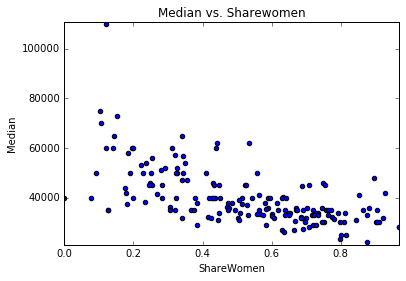

In [10]:
#Generate scatter plot with ShareWomen and Median columns.
ax = recent_grads.plot(x='ShareWomen', y='Median', kind ='scatter')
ax.set_title('Median vs. Sharewomen')
ax.set_xlim(0, 0.97)
ax.set_ylim(21000,111000)

(0, 0.18)

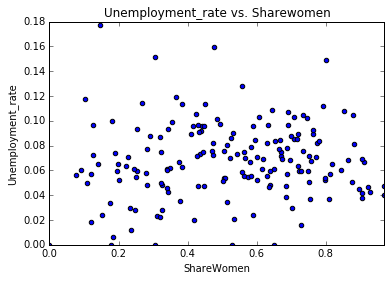

In [11]:
#Generate scatter plot with ShareWomen and Unemployment rate columns.
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind ='scatter')
ax.set_title('Unemployment_rate vs. Sharewomen')
ax.set_xlim(0, 0.97)
ax.set_ylim(0, 0.18)

In [12]:
print(recent_grads['Women'].value_counts().sort_index())

0.0         1
77.0        1
109.0       1
131.0       1
135.0       1
209.0       1
232.0       1
271.0       1
282.0       1
371.0       1
373.0       1
451.0       1
506.0       1
524.0       1
542.0       1
566.0       1
690.0       1
699.0       1
703.0       1
795.0       1
905.0       1
960.0       1
964.0       1
973.0       2
990.0       1
1084.0      1
1122.0      1
1154.0      1
1169.0      1
1247.0      1
           ..
35004.0     1
35037.0     1
35411.0     1
36422.0     1
37054.0     1
40300.0     1
48415.0     1
48883.0     1
49030.0     1
49498.0     1
49654.0     1
52835.0     1
59476.0     1
62893.0     1
63698.0     1
71439.0     1
72593.0     1
82923.0     1
88741.0     1
102352.0    1
104114.0    1
116825.0    1
126354.0    1
136446.0    1
143377.0    1
156118.0    1
157833.0    1
168947.0    1
187621.0    1
307087.0    1
Name: Women, Length: 171, dtype: int64


(21000, 111000)

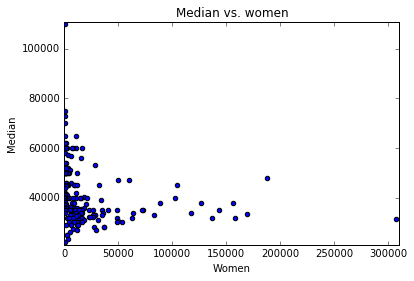

In [13]:
#Generate scatter plot with Women and Median columns.
ax = recent_grads.plot(x='Women', y='Median', kind ='scatter')
ax.set_title('Median vs. women')
ax.set_xlim(0, 310000)
ax.set_ylim(21000,111000)

In [14]:
print(recent_grads['Men'].value_counts().sort_index())

119.0       1
124.0       1
134.0       1
280.0       1
404.0       1
413.0       1
476.0       1
488.0       1
500.0       1
515.0       1
522.0       1
528.0       1
568.0       1
626.0       1
679.0       1
725.0       1
752.0       1
803.0       1
809.0       1
832.0       1
877.0       1
885.0       1
894.0       1
931.0       1
1075.0      1
1123.0      1
1167.0      1
1225.0      1
1499.0      1
1589.0      1
           ..
25463.0     1
26893.0     1
27015.0     1
27392.0     1
29909.0     1
31967.0     1
32041.0     1
32510.0     1
32923.0     1
33258.0     1
39956.0     1
41081.0     1
45683.0     1
58227.0     1
62181.0     1
65511.0     1
70619.0     1
78253.0     1
78857.0     1
80231.0     1
80320.0     1
86648.0     1
89749.0     1
93880.0     1
94519.0     1
99743.0     1
111762.0    1
115030.0    1
132238.0    1
173809.0    1
Name: Men, Length: 172, dtype: int64


(21000, 111000)

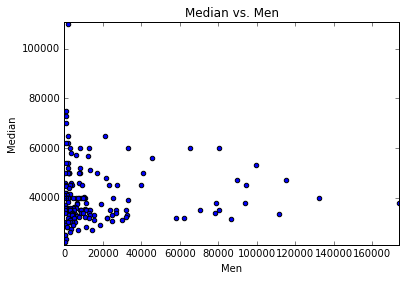

In [15]:
#Generate scatter plot with Men and Median columns.
ax = recent_grads.plot(x='Men', y='Median', kind ='scatter')
ax.set_title('Median vs. Men')
ax.set_xlim(100, 174000)
ax.set_ylim(21000,111000)

From the scatter plots of median vs. sharewomen and unemployment rate vs. sharewomen, we found that even with similar percentages of female students, medians and unemployment rates were different. There is no evidence showing that students that majored in subjects that were majority female make more money. In addition, the scatter plots of median vs. women and median vs. men were similar. This also supported our previous finding.

Now we are interested that is there any link between the number of full_time employees and median salary. 

In [16]:
print(recent_grads['Full_time'].value_counts().sort_index())

111       1
488       1
524       1
556       1
558       1
584       1
593       1
595       1
657       1
733       1
768       1
808       1
828       1
946       1
1069      1
1085      1
1098      1
1264      1
1392      1
1644      1
1658      1
1724      1
1787      1
1819      1
1848      1
1849      1
1931      1
1992      1
2038      1
2049      1
         ..
38302     1
38815     1
39509     1
41235     1
42764     1
43401     1
46399     1
51411     1
55450     1
67448     1
71298     1
73475     1
77428     1
84681     1
91485     1
96567     1
98408     1
109970    1
114386    1
117709    1
123177    1
137921    1
144512    1
147335    1
151191    1
151967    1
156668    1
171385    1
233205    1
251540    1
Name: Full_time, Length: 172, dtype: int64


(21000, 111000)

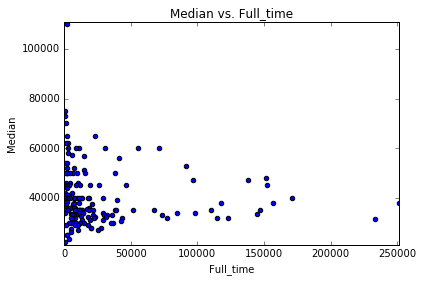

In [17]:
#Generate scatter plot with Full_time and Median columns.
ax = recent_grads.plot(x='Full_time', y='Median', kind ='scatter')
ax.set_title('Median vs. Full_time')
ax.set_xlim(100, 251600)
ax.set_ylim(21000,111000)

It seems that there is no relations between the number of full time employees and median salary. 

## Pandas, Histograms
We can generate histograms to explore the distribution of values in a column. Now we will generate histograms to explore the distributions of several columns.

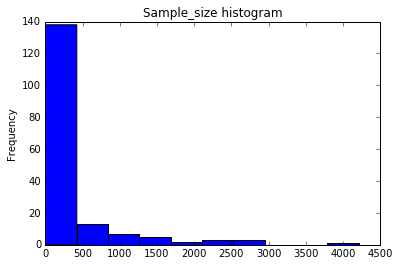

In [18]:
ax1 = recent_grads["Sample_size"].plot(kind = 'hist')
ax1.set_title('Sample_size histogram')

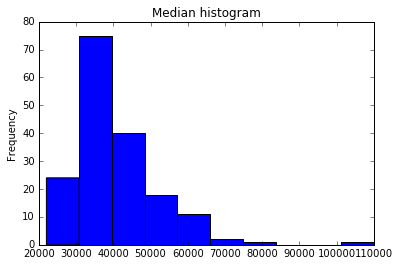

In [19]:
ax2 = recent_grads["Median"].plot(kind = 'hist')
ax2.set_title('Median histogram')

According to the median histogram, the most common median salary range is from 30000 to 40000, which is about 50% of the frequency.

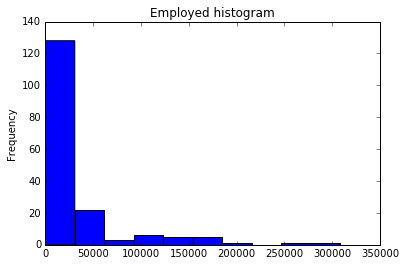

In [20]:
ax3 = recent_grads["Employed"].plot(kind = 'hist')
ax3.set_title('Employed histogram')

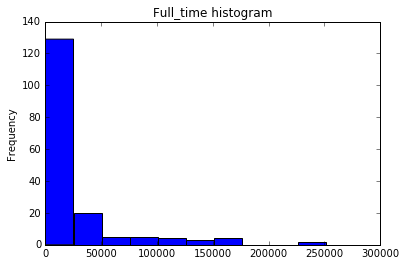

In [21]:
ax4 = recent_grads["Full_time"].plot(kind = 'hist')
ax4.set_title('Full_time histogram')

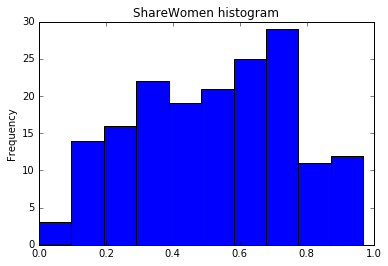

In [22]:
ax5 = recent_grads["ShareWomen"].plot(kind = 'hist')
ax5.set_title('ShareWomen histogram')

Based on the ShareWomen histogram, we notice that about 25% of the majors are predominantly male (with sharewomen percentages less than 0.3). And about 40% of the majors are predominantly female (with sharewomen percentage greater than 0.7).

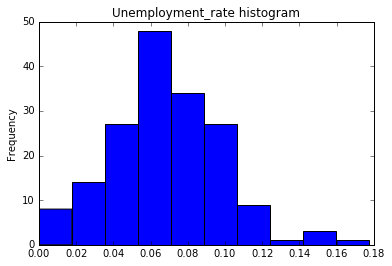

In [23]:
ax6 = recent_grads["Unemployment_rate"].plot(kind = 'hist')
ax6.set_title('Unemployment_rate histogram')

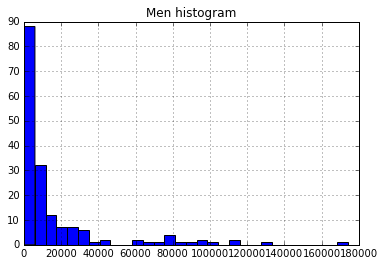

In [24]:
ax7 = recent_grads["Men"].hist(bins = 30, range= (110, 174000))
ax7.set_title('Men histogram')

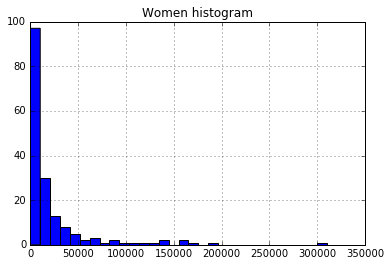

In [25]:
ax8 = recent_grads["Women"].hist(bins = 30, range= (0, 310000))
ax8.set_title('Women histogram')

## Pandas, Scatter Matrix Plot

In the last 2 steps, we created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. A scatter matrix plot consists of n by n plots on a grid, where n is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.

Because scatter matrix plots are frequently used in the exploratory data analysis, pandas contains a function named scatter_matrix() that generates the plots for us. This function is part of the pandas.plotting module and needs to be imported separately. To generate a scatter matrix plot for 2 columns, select just those 2 columns and pass the resulting DataFrame into the scatter_matrix() function.

While passing in a DataFrame with 2 columns returns a 2 by 2 scatter matrix plot (4 plots total), passing in one with 3 returns a 3 by 3 scatter matrix plot (9 plots total). This means that the number of plots generated scales exponentially by a factor of 2, not linearly. If you increase the number of columns to 4 or more, the resulting grid of plots becomes unreadable and difficult to interpret (even if you increase the plotting area using the figsize parameter).

Next we will generate several scatter matrices to explore the questions from the last few steps.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32a9708a58>,
      dtype=object)

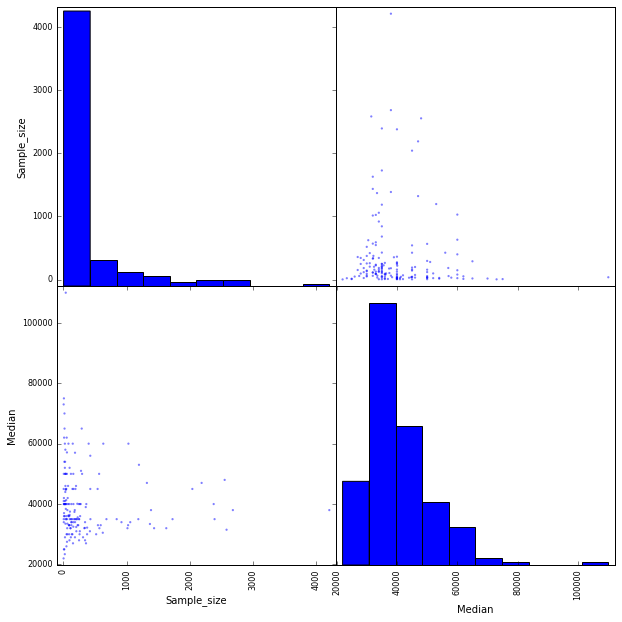

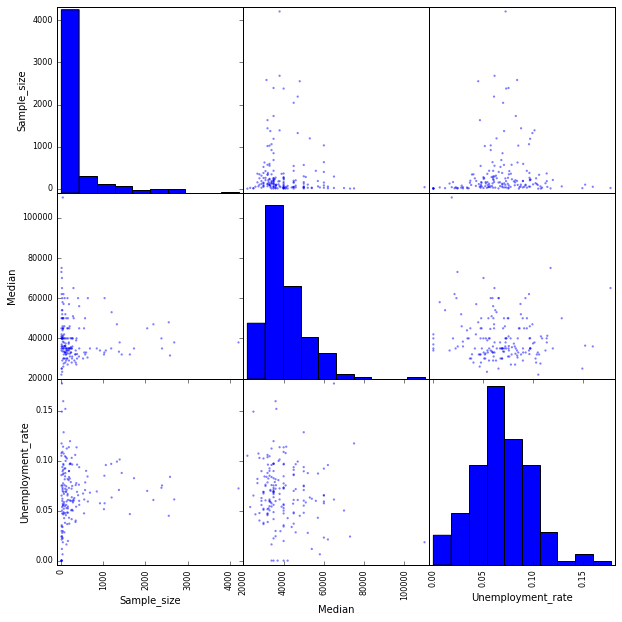

In [26]:
from pandas.plotting import scatter_matrix 
#Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize = (10,10))
#Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize = (10,10))

These scatter matrices we created also support our previous conclusions: sample size is not related with the median salary. So students in more popular majors will make more money, but it is also possible that they won't make more money.

## Pandas, Bar Plots

An effective bar plot uses categorical values on one axis and numerical values on the other axis. Because bar plots can help us find the category corresponding to the smallest or largest values, it's important that we restrict the number of bars in a single plot. Using a bar plot to visualize hundreds of values makes it difficult to trace the category with the smallest or largest value. In this section we will create bar plots to compare different values.

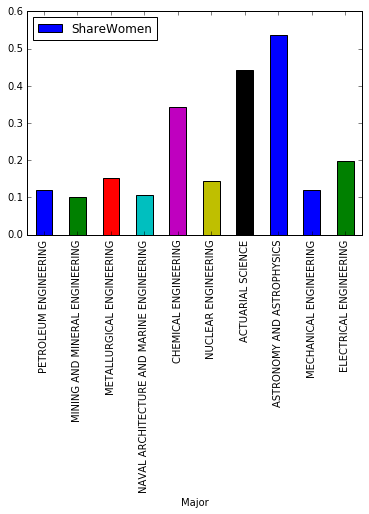

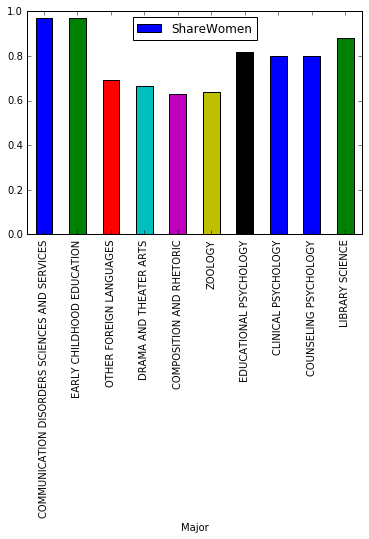

In [32]:
#Compare the percentages of women (ShareWomen) from the first ten rows and 
#last ten rows of the recent_grads dataframe.
recent_grads[:10].plot.bar(x= 'Major', y= 'ShareWomen')
recent_grads[-10:].plot.bar(x= 'Major', y='ShareWomen')

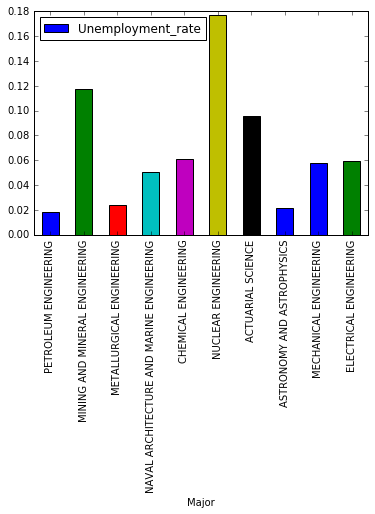

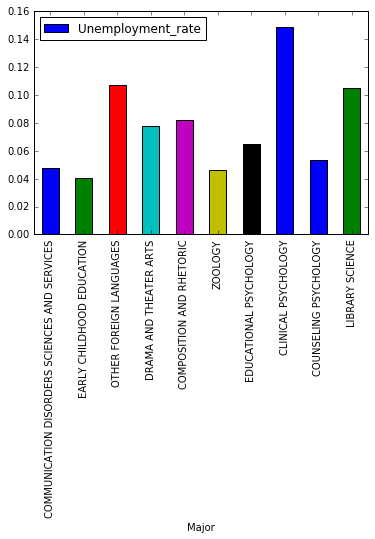

In [33]:
#compare the unemployment rate (Unemployment_rate) from the first ten rows 
#and last ten rows of the recent_grads dataframe.
recent_grads[:10].plot.bar(x = 'Major', y='Unemployment_rate')
recent_grads[-10:].plot.bar(x = 'Major', y='Unemployment_rate')

In this guided project, we learned how to use the plotting tools built into pandas to explore data on job outcomes.